In [1]:
import numpy as np
import pandas as pd
from deeptables.models import deeptable, deepnets
from deeptables.datasets import dsutils
from sklearn.model_selection import train_test_split

In [2]:
df = dsutils.load_bank()
df.drop(['id'], axis=1, inplace=True)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
y = df_train.pop('y')
y_test = df_test.pop('y')

#### 训练模型

In [3]:
config = deeptable.ModelConfig(nets=deepnets.DeepFM, auto_discrete=True, metrics=['AUC'])
dt = deeptable.DeepTable(config=config)

model, history = dt.fit(df_train, y, epochs=10)

2 class detected, {'yes', 'no'}, so inferred as a [binary classification] task
Preparing features taken 0.047048330307006836s
Imputation taken 0.3113720417022705s
Categorical encoding taken 0.5116350650787354s


/Users/jack/opt/anaconda3/envs/tf_2_0/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/Users/jack/opt/anaconda3/envs/tf_2_0/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/Users/jack/opt/anaconda3/envs/tf_2_0/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


Discretization taken 0.25472283363342285s
Injected a callback [EarlyStopping]. monitor:val_AUC, patience:1, mode:max
>>>>>>>>>>>>>>>>>>>>>> Model Desc <<<<<<<<<<<<<<<<<<<<<<< 
---------------------------------------------------------
inputs:
---------------------------------------------------------
['all_categorical_vars: (16)', 'input_continuous_all: (7)']
---------------------------------------------------------
embeddings:
---------------------------------------------------------
input_dims: [14, 5, 6, 4, 4, 4, 5, 14, 6, 5, 9, 4, 7, 4, 6, 4]
output_dims: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
dropout: 0.3
---------------------------------------------------------
dense: dropout: 0
batch_normalization: False
---------------------------------------------------------
concat_embed_dense: shape: (None, 71)
---------------------------------------------------------
nets: ['dnn_nets', 'linear', 'fm_nets']
---------------------------------------------------------
dnn: input_shape (N

In [4]:
proba = dt.predict_proba(df_test)
preds = dt.predict(df_test)

/Users/jack/opt/anaconda3/envs/tf_2_0/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [5]:
#model.model.summary()

#### 模型评估

In [6]:
result = dt.evaluate(df_test,y_test, batch_size=512, verbose=0)

In [7]:
result

{'loss': 0.22103416146668886, 'auc': 0.930402}

#### 输出网络架构

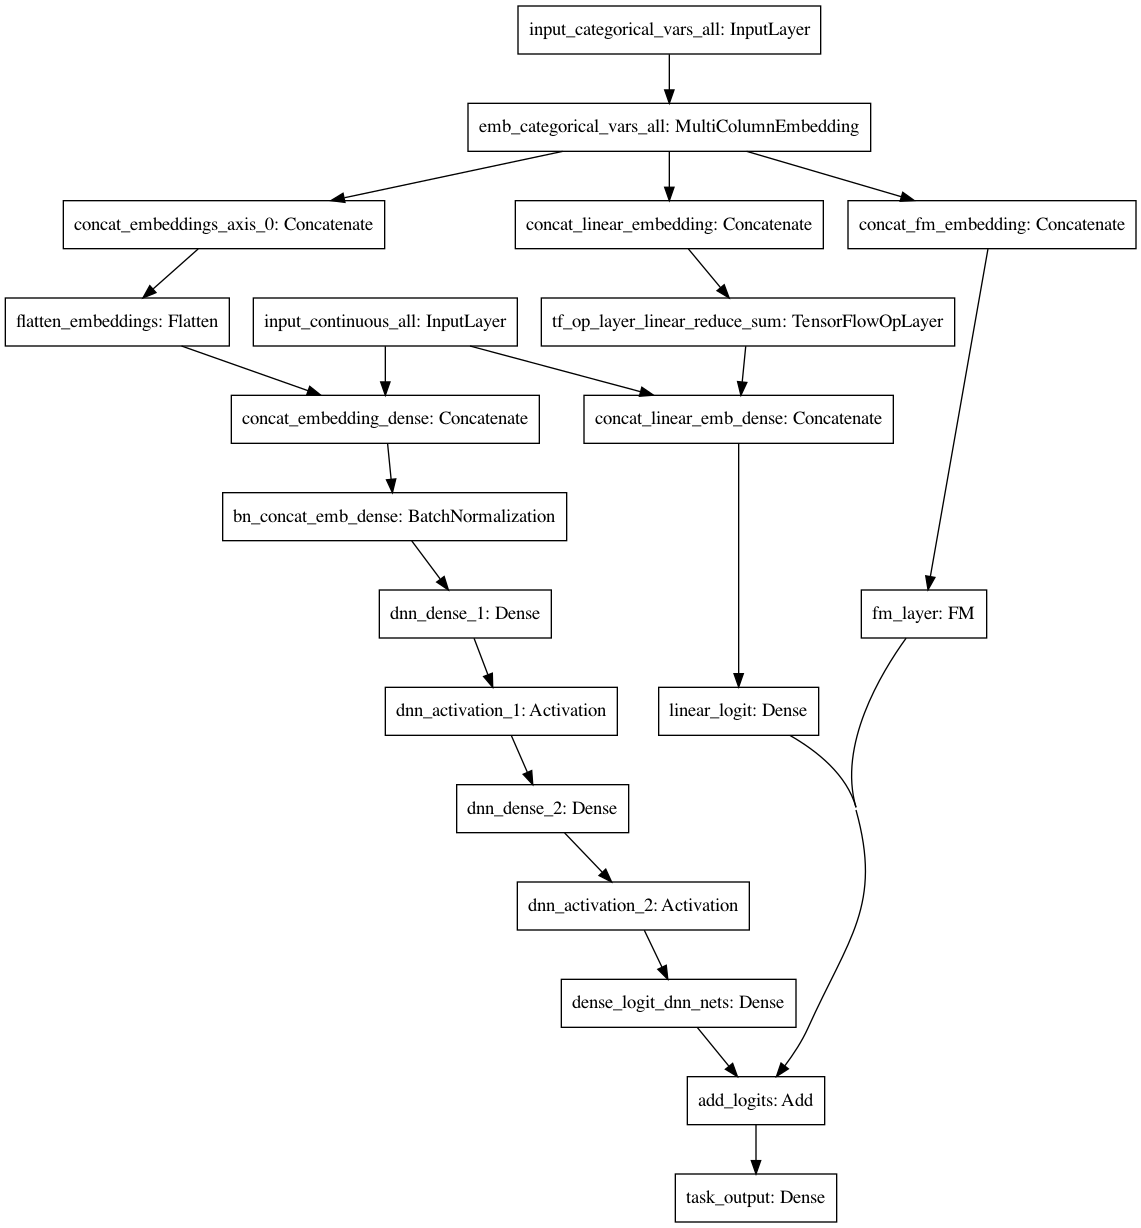

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model.model)

#### 分析训练数据

In [9]:
import matplotlib.pyplot as plt

In [10]:
history.history

{'loss': [29.475638984984947, 0.48223958303954745, 0.2910911392523853, 0.25459402107185786], 'auc': [0.6427965, 0.8202702, 0.8759316, 0.8958188], 'val_loss': [0.7646228752270264, 0.24609174191768074, 0.21236652380596774, 0.23365315741557732], 'val_auc': [0.7830583, 0.9134, 0.93301135, 0.93246216]}

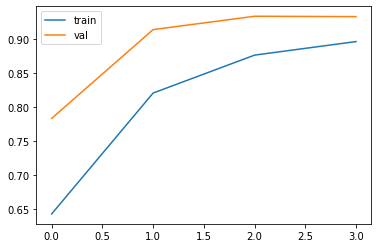

In [11]:
plt.plot(history.history['AUC'])
plt.plot(history.history['val_AUC'])
plt.legend(['train', 'val'], loc='upper left') 

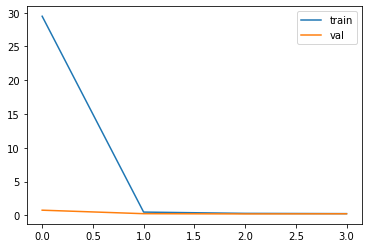

In [12]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'], loc='upper right') 